Project Name : Zomato Data Analysis
To address the analysis, we need to respond to the subsequent inquiries:

Python and its following libraries are used to analyze Zomato data.
1. Numpy– With Numpy arrays, complex computations are executed quickly, and large calculations are handled efficiently.
2. Matplotlib– It has a wide range of features for creating high-quality plots, charts, histograms, scatter plots, and more.
3. Pandas– The library simplifies the loading of data frames into 2D arrays and provides functions for performing multiple analysis tasks in a single operation.
4. Seaborn– It offers a high-level interface for creating visually appealing and informative statistical graphics.

To address our analysis, we need to respond to the subsequent inquiries:
1. Do a greater number of restaurants provide online delivery as opposed to offline services?
2. Which types of restaurants are the most favored by the general public?
3. What price range is preferred by couples for their dinner at restaurants?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [8]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Let's conver the rate column to float and remove the denominator

In [9]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handlerate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


There is no null value in dataframe

Text(0.5, 0, 'Type of Restaurant')

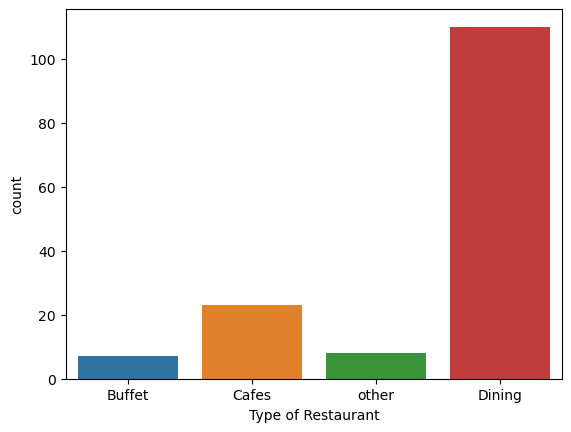

In [11]:
# Let's explore the listed_in(type)column
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurant")

Conclusion : The majority if the restaurants fall into the dining category.

Text(0, 0.5, 'votes')

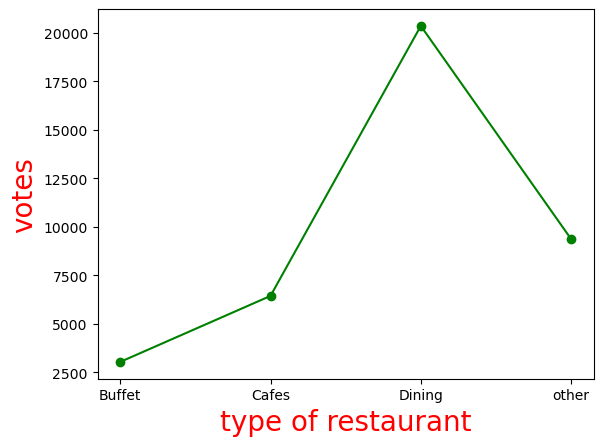

In [13]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("type of restaurant", c="red", size=20)
plt.ylabel("votes", c="red", size=20)

Conclusion : Dining restaurants are preferred by a larger number of individuals

In [14]:
# Now we will determine the restaurants name that received the maximum votes based on a given dataframe.
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

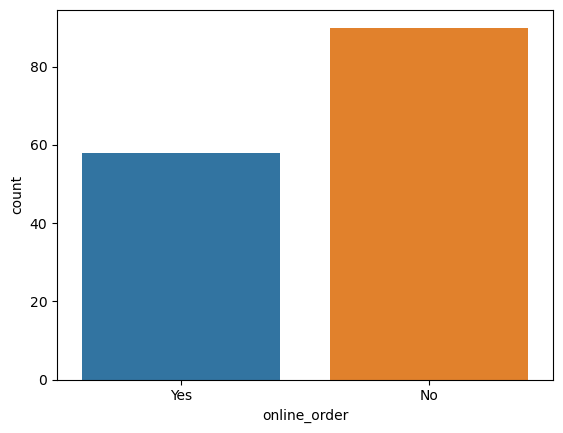

In [15]:
# Exploring the online_order column
sns.countplot(x=dataframe['online_order'])

Conclusion: This suggests that a majority of the restaurants do not accept online orders

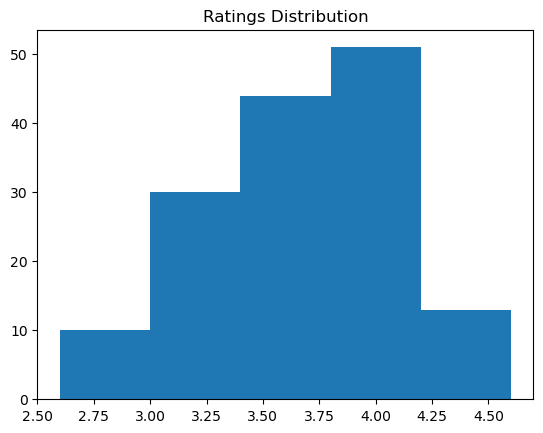

In [16]:
# Exploring the rate column
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

Conclusion : The majority of restaurants received ratings ranging from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

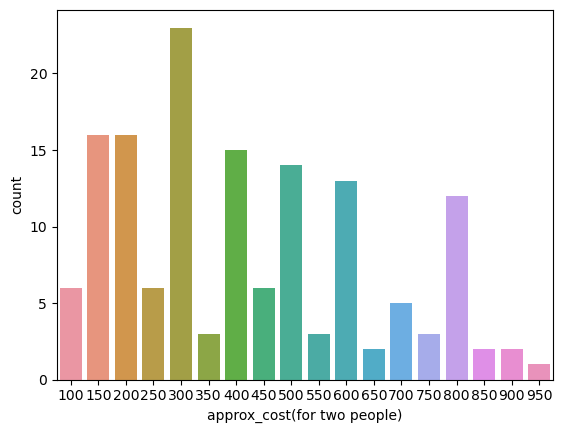

In [17]:
# Exploring the approx_cost(for two people) column
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

Conclusion : The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

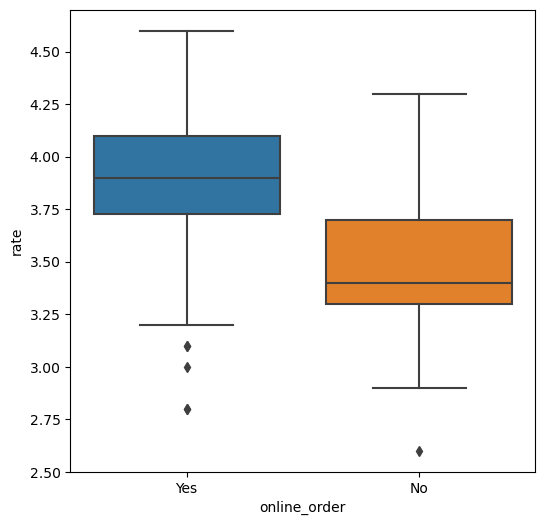

In [18]:
# We need to examine whether online orders receive higher ratings than offline orders.
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

Conclusion : Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings

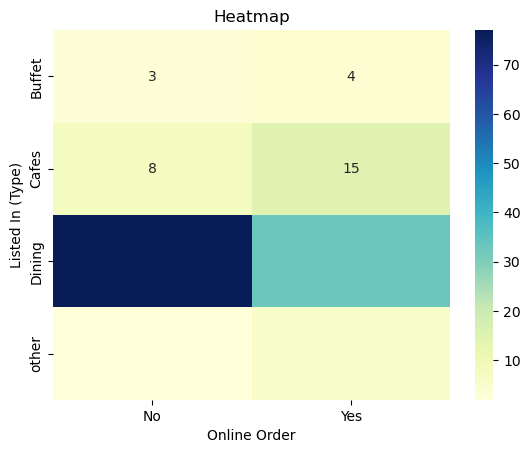

In [20]:
pivot_table = dataframe.pivot_table(index='listed_in(type)',columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

# Conclusion : Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. 
# This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.